# Data

## Get DataFrame

In [1]:
import pandas as pd


df = pd.read_csv('../data/df.csv', sep = '\t')

df['combined'] = df['gender'] + "_" + df['subCategory'] + "_" + df['articleType'] + "_" + "_" + df['season'] + "_" + df['usage']

df

,id,gender,subCategory,articleType,season,usage,image_path,gender_enc,subCategory_enc,articleType_enc,season_enc,usage_enc,combined
0,9605,Men,Topwear,Shirts,Fall/Winter,Casual,../data/augmented_images/Shirts/9605.jpg,0,1,4,0,0,Men_Topwear_Shirts__Fall/Winter_Casual
1,6708,Men,Topwear,Shirts,Spring/Summer,Casual,../data/augmented_images/Shirts/6708.jpg,0,1,4,1,0,Men_Topwear_Shirts__Spring/Summer_Casual
2,9648,Men,Topwear,Shirts,Fall/Winter,Formal,../data/augmented_images/Shirts/9648.jpg,0,1,4,0,1,Men_Topwear_Shirts__Fall/Winter_Formal
3,29769,Men,Topwear,Shirts,Spring/Summer,Casual,../data/augmented_images/Shirts/29769.jpg,0,1,4,1,0,Men_Topwear_Shirts__Spring/Summer_Casual
4,14526,Men,Topwear,Shirts,Fall/Winter,Formal,../data/augmented_images/Shirts/14526.jpg,0,1,4,0,1,Men_Topwear_Shirts__Fall/Winter_Formal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,33717,Women,Bottomwear,Leggings,Spring/Summer,Casual,../data/augmented_images/Leggings/872_augm_337...,1,0,3,1,0,Women_Bottomwear_Leggings__Spring/Summer_Casual
13996,25036,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/873_augm_250...,1,0,3,0,0,Women_Bottomwear_Leggings__Fall/Winter_Casual
13997,22463,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/874_augm_224...,1,0,3,0,0,Women_Bottomwear_Leggings__Fall/Winter_Casual
13998,23045,Women,Bottomwear,Leggings,Fall/Winter,Casual,../data/augmented_images/Leggings/875_augm_230...,1,0,3,0,0,Women_Bottomwear_Leggings__Fall/Winter_Casual


### Make X

In [2]:
import cv2
import numpy as np


image_paths = df['image_path'].tolist()

# Initialize an empty list to store the image data
X = []

# Define a function to read and preprocess images
def load_and_preprocess_image(file_path):
    # Read the image using OpenCV
    img = cv2.imread(file_path)
    # Resize the image to a common size (e.g., 224x224 pixels)
    img = cv2.resize(img, (224, 224))
    # Normalize pixel values to the range [0, 1]
    img = img.astype(np.float32) / 255.0 
    return img

# Loop through each image path and load the corresponding image
for path in image_paths:
    image = load_and_preprocess_image(path)
    X.append(image)

# Convert the list of images to a NumPy array
X = np.array(X)
X = X.reshape(14000, -1).reshape(14000, -1)

# Now, 'X' contains preprocessed image data that can be used for classification.

# Check the shape of 'X' to ensure it's in the right format
print("Shape of X:", X.shape)

Shape of X: (14000, 150528)


In [3]:
# Define the target labels 'y' for each class
y_gender = df['gender'].values
y_subCategory = df['subCategory'].values
y_season = df['season'].values
y_usage = df['usage'].values
y_articleType = df['articleType'].values

# Create y as an array containing these columns
y = np.array([y_gender, y_subCategory, y_season, y_usage, y_articleType]).T

# Check the shape of 'X' to ensure it's in the right format
print("Shape of y:", y.shape)

Shape of y: (14000, 5)


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Shapes:")

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (11200, 150528)
X_test: (2800, 150528)
y_train: (11200, 5)
y_test: (2800, 5)


In [5]:
classes = [np.unique(y[:, i]) for i in range(y.shape[1])]
classes

[array(['Men', 'Women'], dtype=object),
 array(['Bottomwear', 'Topwear'], dtype=object),
 array(['Fall/Winter', 'Spring/Summer'], dtype=object),
 array(['Casual', 'Formal', 'Sports'], dtype=object),
 array(['Capris', 'Jackets', 'Jeans', 'Leggings', 'Shirts', 'Shorts',
        'Skirts', 'Sweaters', 'Sweatshirts', 'Tops', 'Track Pants',
        'Trousers', 'Tshirts', 'Tunics'], dtype=object)]

In [6]:
# Define labels for each class
gender_labels = sorted(df.gender.unique().tolist())
subCategory_labels = sorted(df.subCategory.unique().tolist())
season_labels = sorted(df.season.unique().tolist())
usage_labels = sorted(df.usage.unique().tolist())
articleType_labels = sorted(df.articleType.unique().tolist())
target_names = [gender_labels, subCategory_labels, season_labels, usage_labels, articleType_labels]

# Print the result
print(target_names)

[['Men', 'Women'], ['Bottomwear', 'Topwear'], ['Fall/Winter', 'Spring/Summer'], ['Casual', 'Formal', 'Sports'], ['Capris', 'Jackets', 'Jeans', 'Leggings', 'Shirts', 'Shorts', 'Skirts', 'Sweaters', 'Sweatshirts', 'Tops', 'Track Pants', 'Trousers', 'Tshirts', 'Tunics']]


# SGD Classifier (SVM)

## Training

In [7]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier


# loss="hinge": (soft-margin) linear Support Vector Machine
model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, tol=0.001, shuffle=True, verbose=2, epsilon=0.1, 
              n_jobs=-1, random_state=123, learning_rate='optimal', eta0=0.0, power_t=0.5, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
multi_svc = MultiOutputClassifier(model, n_jobs=-1)

In [8]:
multi_svc.partial_fit(X_train, y_train, classes=classes)

MultiOutputClassifier(estimator=SGDClassifier(n_jobs=-1, random_state=123,
                                              verbose=2),
                      n_jobs=-1)

## Evaluation

### Train Dataset

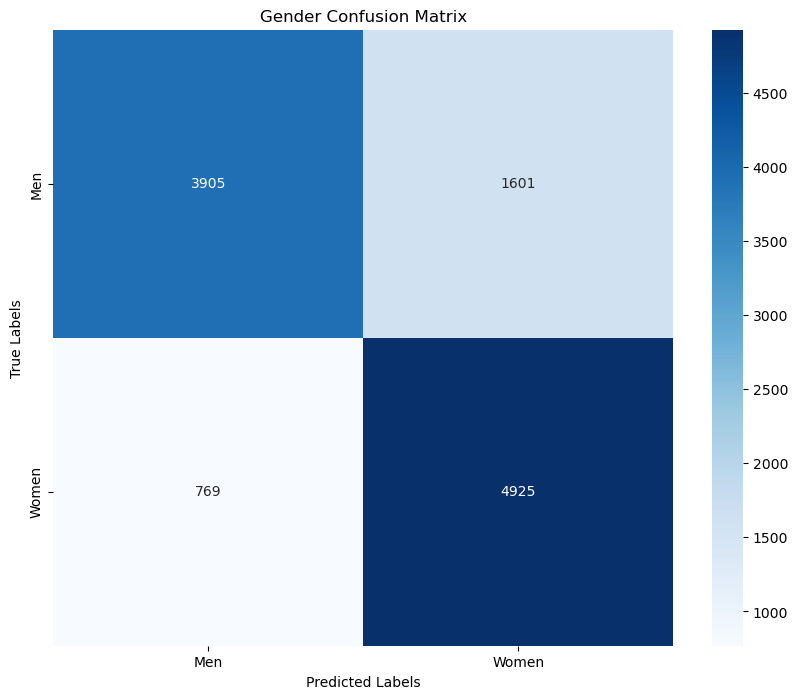

Gender Classification Report:

              precision    recall  f1-score   support

         Men       0.84      0.71      0.77      5506
       Women       0.75      0.86      0.81      5694

    accuracy                           0.79     11200
   macro avg       0.80      0.79      0.79     11200
weighted avg       0.79      0.79      0.79     11200



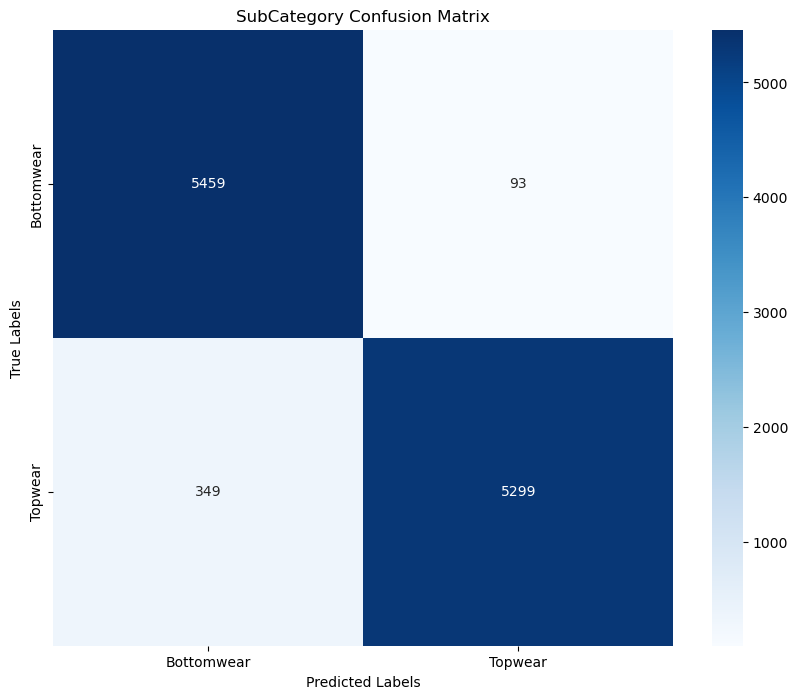

SubCategory Classification Report:

              precision    recall  f1-score   support

  Bottomwear       0.94      0.98      0.96      5552
     Topwear       0.98      0.94      0.96      5648

    accuracy                           0.96     11200
   macro avg       0.96      0.96      0.96     11200
weighted avg       0.96      0.96      0.96     11200



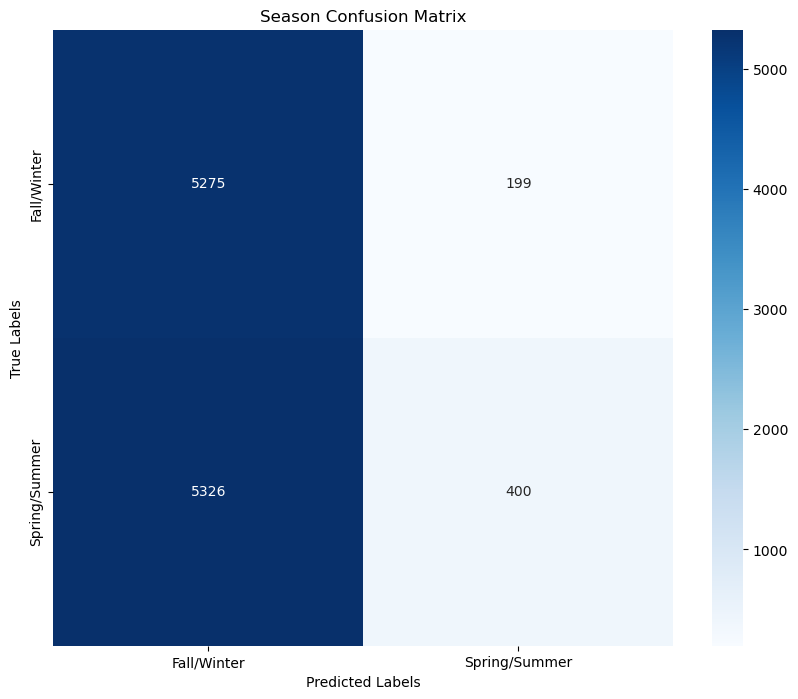

Season Classification Report:

               precision    recall  f1-score   support

  Fall/Winter       0.50      0.96      0.66      5474
Spring/Summer       0.67      0.07      0.13      5726

     accuracy                           0.51     11200
    macro avg       0.58      0.52      0.39     11200
 weighted avg       0.58      0.51      0.39     11200



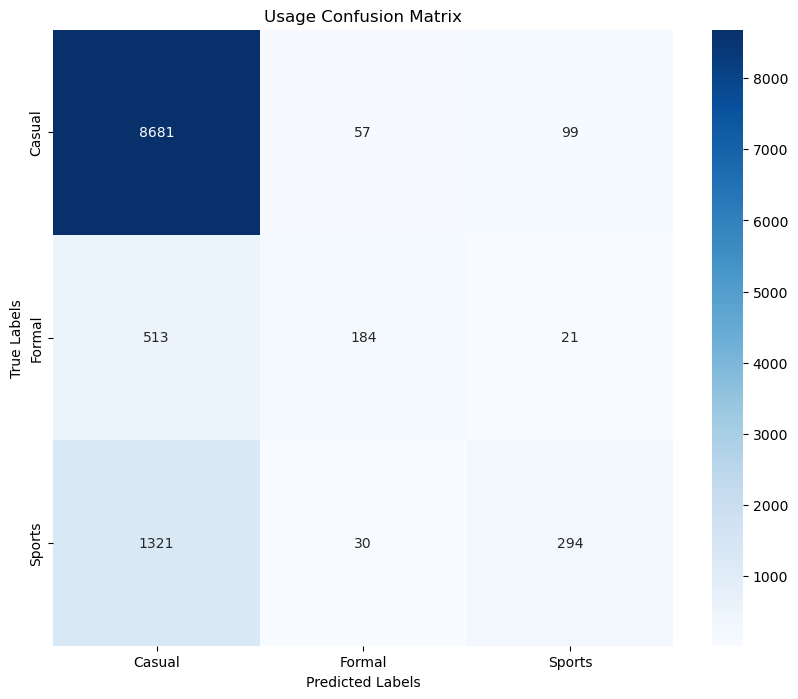

Usage Classification Report:

              precision    recall  f1-score   support

      Casual       0.83      0.98      0.90      8837
      Formal       0.68      0.26      0.37       718
      Sports       0.71      0.18      0.29      1645

    accuracy                           0.82     11200
   macro avg       0.74      0.47      0.52     11200
weighted avg       0.80      0.82      0.77     11200



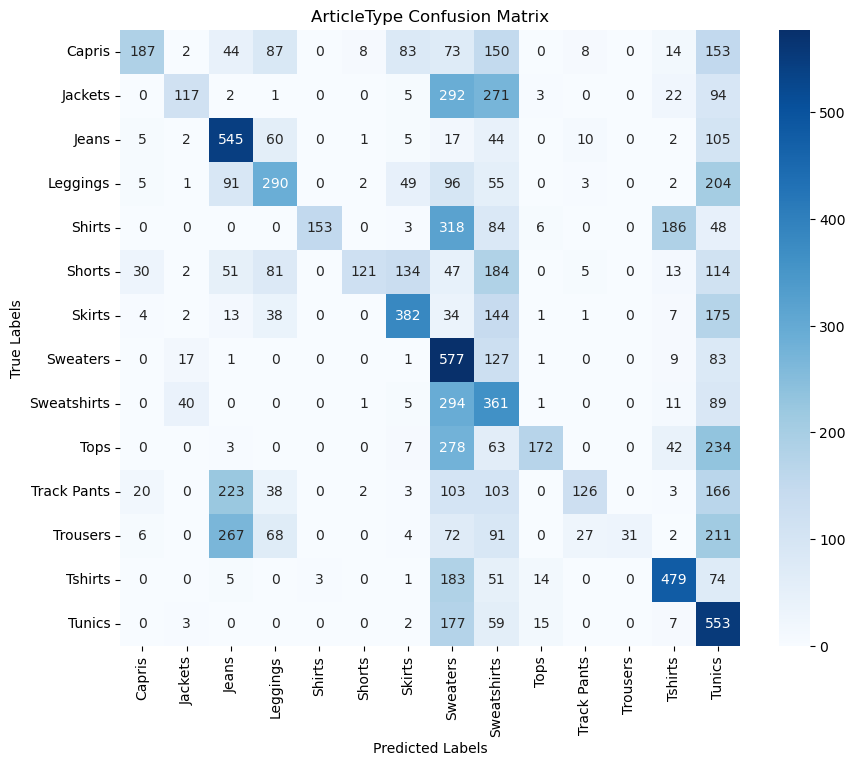

ArticleType Classification Report:

              precision    recall  f1-score   support

      Capris       0.73      0.23      0.35       809
     Jackets       0.63      0.14      0.24       807
       Jeans       0.44      0.68      0.53       796
    Leggings       0.44      0.36      0.40       798
      Shirts       0.98      0.19      0.32       798
      Shorts       0.90      0.15      0.26       782
      Skirts       0.56      0.48      0.51       801
    Sweaters       0.23      0.71      0.34       816
 Sweatshirts       0.20      0.45      0.28       802
        Tops       0.81      0.22      0.34       799
 Track Pants       0.70      0.16      0.26       787
    Trousers       1.00      0.04      0.08       779
     Tshirts       0.60      0.59      0.60       810
      Tunics       0.24      0.68      0.35       816

    accuracy                           0.37     11200
   macro avg       0.60      0.36      0.35     11200
weighted avg       0.60      0.37      0.35 

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


output = ["Gender", "SubCategory", "Season", "Usage", "ArticleType"]  # Adjust the order to match your output
y_pred = multi_svc.predict(X_train)

for i, target_name in enumerate(output):
    
    y_pred_output = y_pred[:, i]  # Get the corresponding predicted labels for this output
    y_true_output = y_train[:, i]  # Get the corresponding true labels for this output
    
    # Confusion Matrix
    # Generate confusion matrix
    cm = confusion_matrix(y_true_output, y_pred_output, labels=target_names[i])
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names[i], yticklabels=target_names[i])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(target_name + " Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(target_name, "Classification Report:\n")
    # Print classification report for this output
    print(classification_report(y_true_output, y_pred_output, target_names=target_names[i], zero_division=0))

### Test Dataset

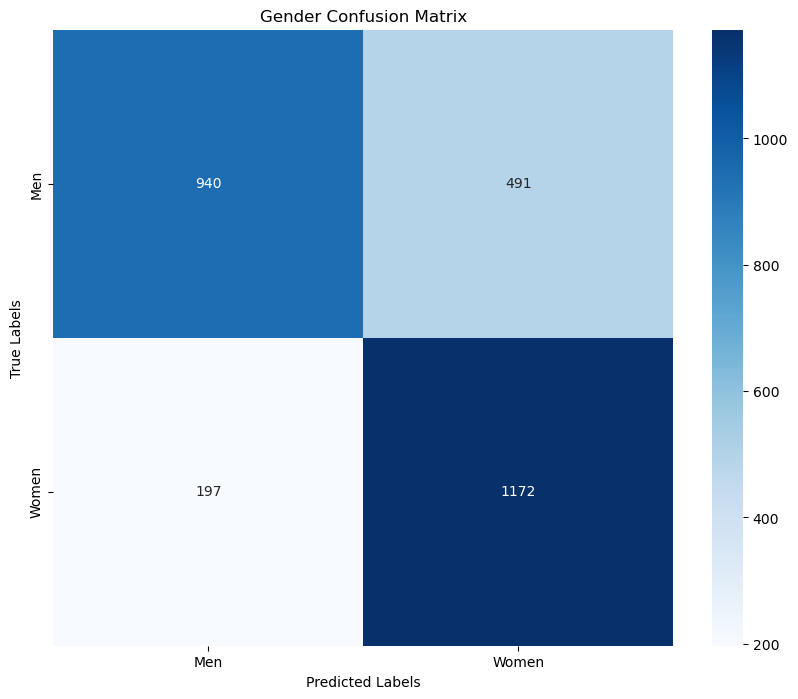

Gender Classification Report:

              precision    recall  f1-score   support

         Men       0.83      0.66      0.73      1431
       Women       0.70      0.86      0.77      1369

    accuracy                           0.75      2800
   macro avg       0.77      0.76      0.75      2800
weighted avg       0.77      0.75      0.75      2800



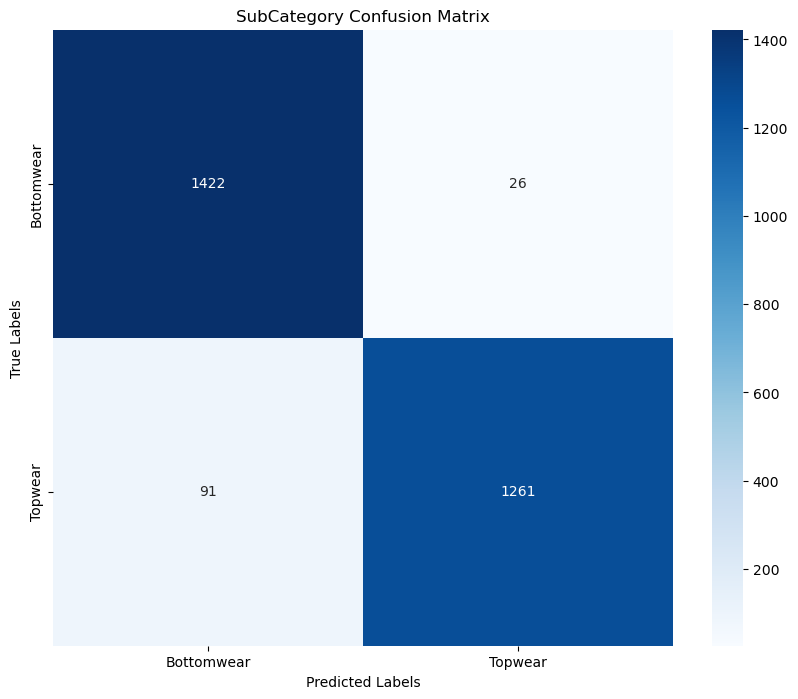

SubCategory Classification Report:

              precision    recall  f1-score   support

  Bottomwear       0.94      0.98      0.96      1448
     Topwear       0.98      0.93      0.96      1352

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



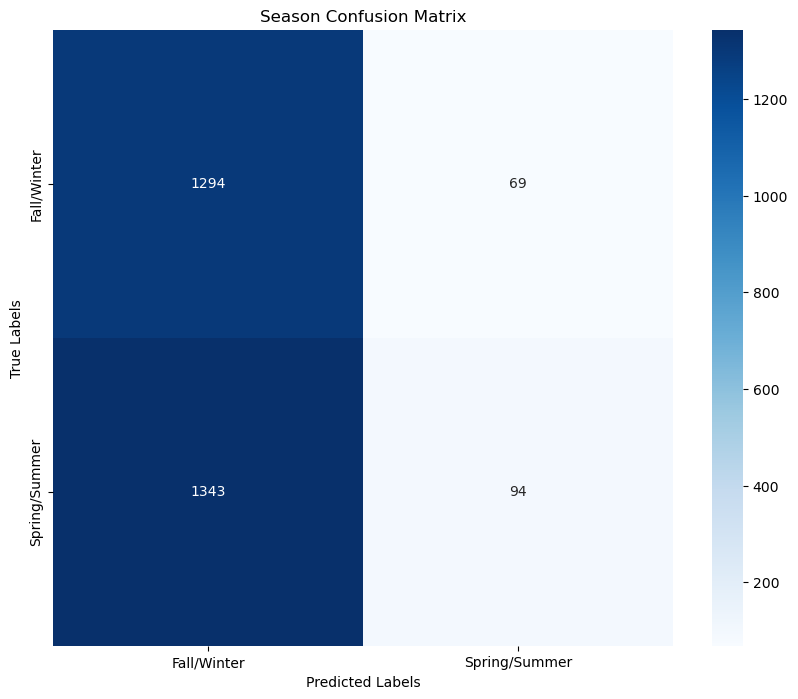

Season Classification Report:

               precision    recall  f1-score   support

  Fall/Winter       0.49      0.95      0.65      1363
Spring/Summer       0.58      0.07      0.12      1437

     accuracy                           0.50      2800
    macro avg       0.53      0.51      0.38      2800
 weighted avg       0.53      0.50      0.38      2800



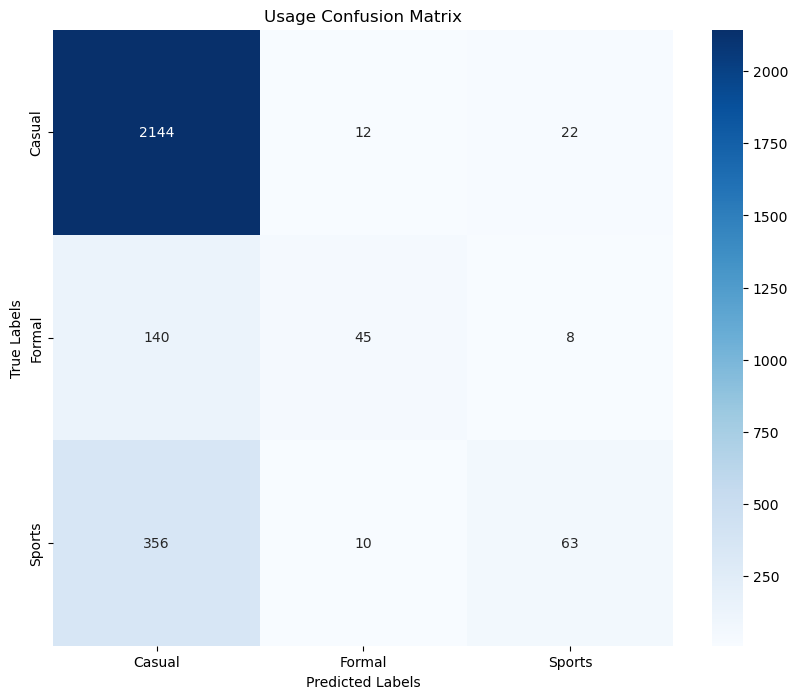

Usage Classification Report:

              precision    recall  f1-score   support

      Casual       0.81      0.98      0.89      2178
      Formal       0.67      0.23      0.35       193
      Sports       0.68      0.15      0.24       429

    accuracy                           0.80      2800
   macro avg       0.72      0.45      0.49      2800
weighted avg       0.78      0.80      0.75      2800



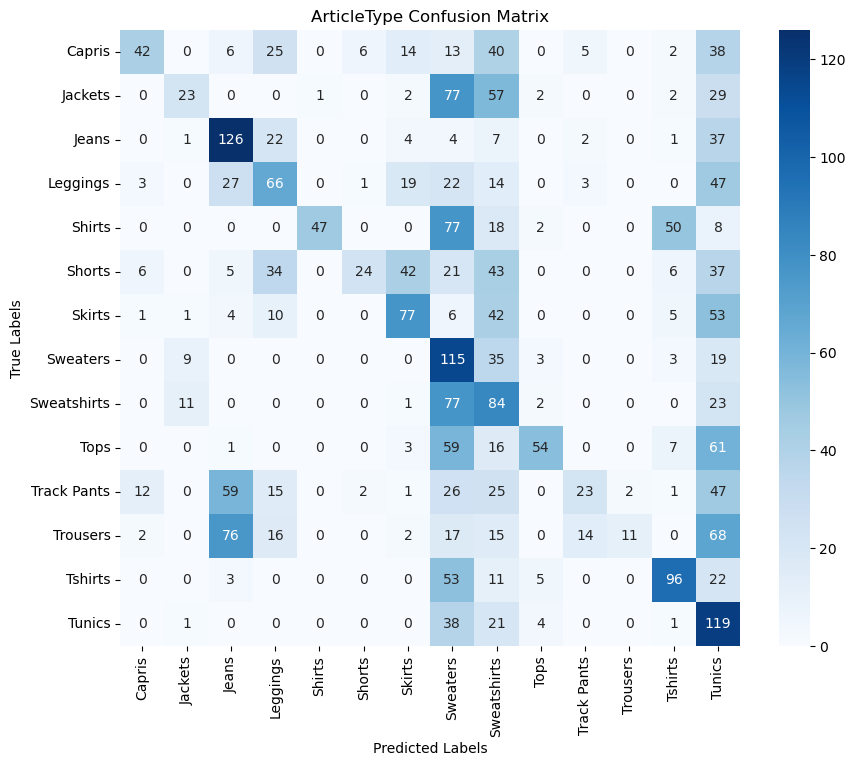

ArticleType Classification Report:

              precision    recall  f1-score   support

      Capris       0.64      0.22      0.33       191
     Jackets       0.50      0.12      0.19       193
       Jeans       0.41      0.62      0.49       204
    Leggings       0.35      0.33      0.34       202
      Shirts       0.98      0.23      0.38       202
      Shorts       0.73      0.11      0.19       218
      Skirts       0.47      0.39      0.42       199
    Sweaters       0.19      0.62      0.29       184
 Sweatshirts       0.20      0.42      0.27       198
        Tops       0.75      0.27      0.40       201
 Track Pants       0.49      0.11      0.18       213
    Trousers       0.85      0.05      0.09       221
     Tshirts       0.55      0.51      0.53       190
      Tunics       0.20      0.65      0.30       184

    accuracy                           0.32      2800
   macro avg       0.52      0.33      0.31      2800
weighted avg       0.53      0.32      0.31 

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


output = ["Gender", "SubCategory", "Season", "Usage", "ArticleType"]  # Adjust the order to match your output
y_pred = multi_svc.predict(X_test)

for i, target_name in enumerate(output):
    
    y_pred_output = y_pred[:, i]  # Get the corresponding predicted labels for this output
    y_true_output = y_test[:, i]  # Get the corresponding true labels for this output
    
    # Confusion Matrix
    # Generate confusion matrix
    cm = confusion_matrix(y_true_output, y_pred_output, labels=target_names[i])
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names[i], yticklabels=target_names[i])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(target_name + " Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(target_name, "Classification Report:\n")
    # Print classification report for this output
    print(classification_report(y_true_output, y_pred_output, target_names=target_names[i], zero_division=0))

# Passive Aggressive Classifier

## Training

In [11]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import PassiveAggressiveClassifier


# loss="hinge": (soft-margin) linear Support Vector Machine
model = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, shuffle=True, verbose=2, loss='hinge', n_jobs=-1, random_state=None, warm_start=False)
pass_aggr = MultiOutputClassifier(model, n_jobs=-1)

In [12]:
pass_aggr.partial_fit(X_train, y_train, classes=classes)

MultiOutputClassifier(estimator=PassiveAggressiveClassifier(n_jobs=-1,
                                                            verbose=2),
                      n_jobs=-1)

## Evaluation

### Train Dataset

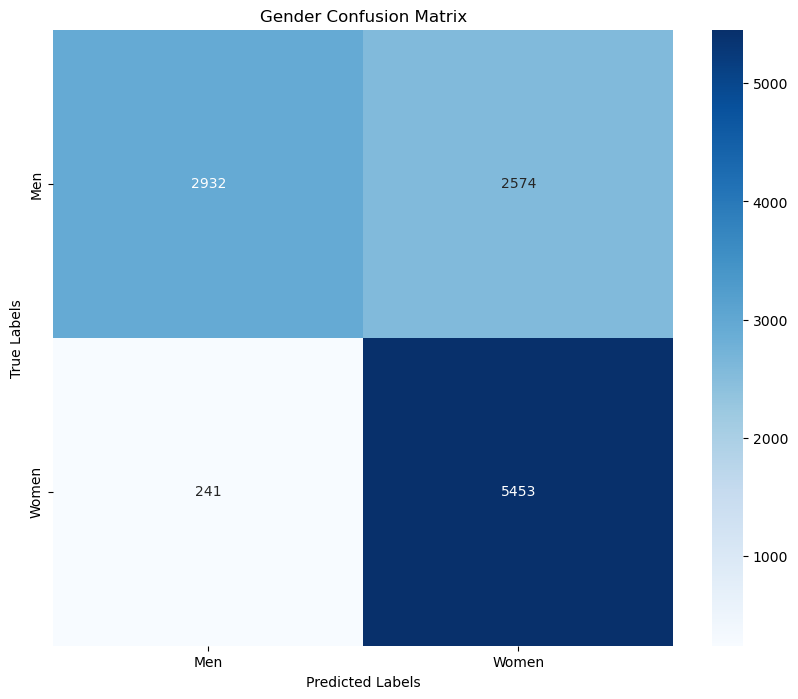

Gender Classification Report:

              precision    recall  f1-score   support

         Men       0.92      0.53      0.68      5506
       Women       0.68      0.96      0.79      5694

    accuracy                           0.75     11200
   macro avg       0.80      0.75      0.74     11200
weighted avg       0.80      0.75      0.74     11200



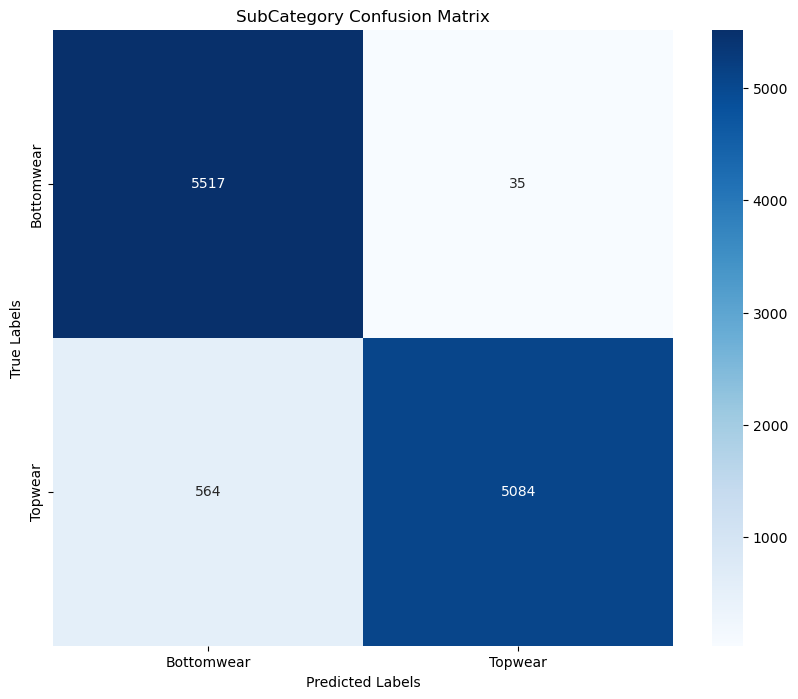

SubCategory Classification Report:

              precision    recall  f1-score   support

  Bottomwear       0.91      0.99      0.95      5552
     Topwear       0.99      0.90      0.94      5648

    accuracy                           0.95     11200
   macro avg       0.95      0.95      0.95     11200
weighted avg       0.95      0.95      0.95     11200



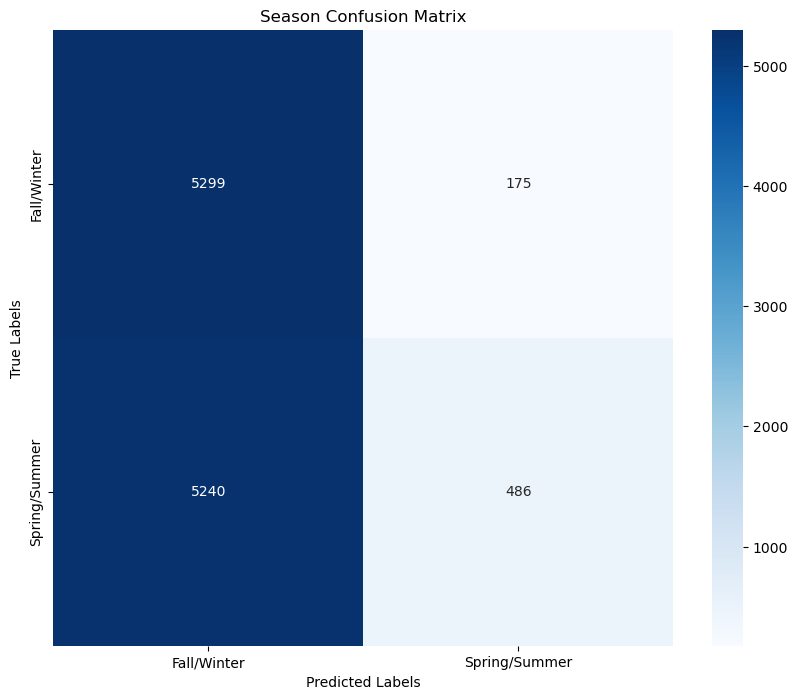

Season Classification Report:

               precision    recall  f1-score   support

  Fall/Winter       0.50      0.97      0.66      5474
Spring/Summer       0.74      0.08      0.15      5726

     accuracy                           0.52     11200
    macro avg       0.62      0.53      0.41     11200
 weighted avg       0.62      0.52      0.40     11200



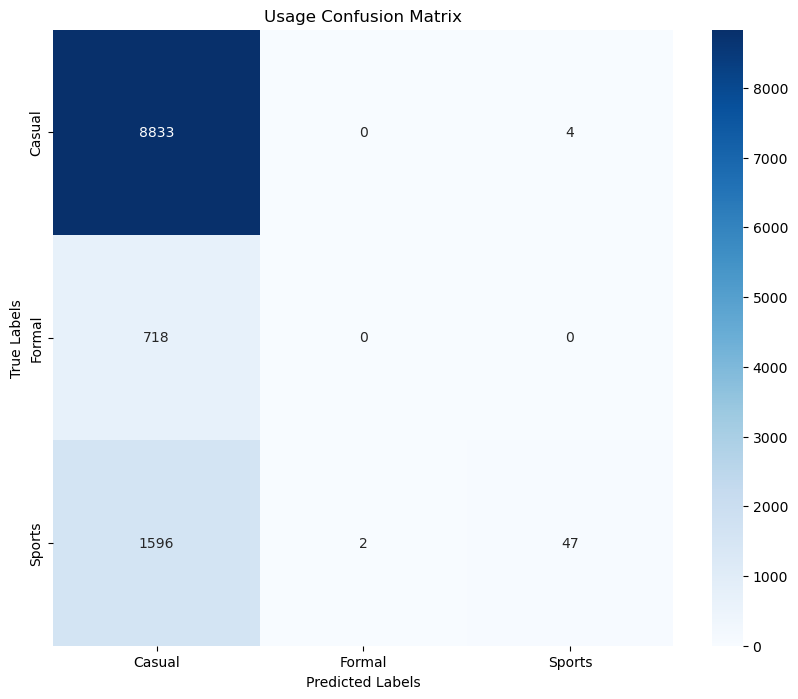

Usage Classification Report:

              precision    recall  f1-score   support

      Casual       0.79      1.00      0.88      8837
      Formal       0.00      0.00      0.00       718
      Sports       0.92      0.03      0.06      1645

    accuracy                           0.79     11200
   macro avg       0.57      0.34      0.31     11200
weighted avg       0.76      0.79      0.71     11200



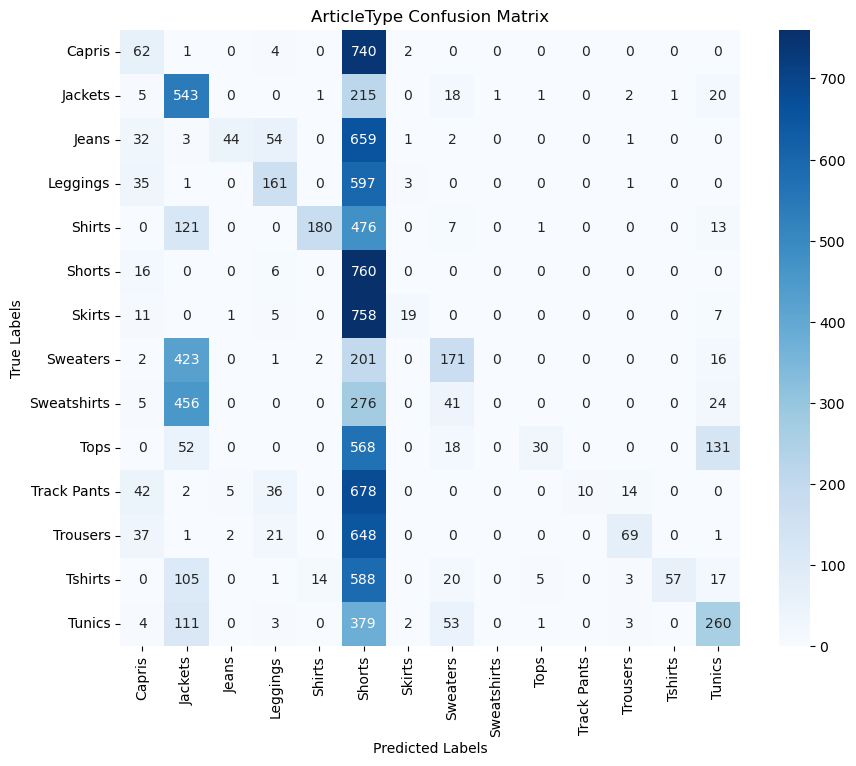

ArticleType Classification Report:

              precision    recall  f1-score   support

      Capris       0.25      0.08      0.12       809
     Jackets       0.30      0.67      0.41       807
       Jeans       0.85      0.06      0.10       796
    Leggings       0.55      0.20      0.30       798
      Shirts       0.91      0.23      0.36       798
      Shorts       0.10      0.97      0.18       782
      Skirts       0.70      0.02      0.05       801
    Sweaters       0.52      0.21      0.30       816
 Sweatshirts       0.00      0.00      0.00       802
        Tops       0.79      0.04      0.07       799
 Track Pants       1.00      0.01      0.03       787
    Trousers       0.74      0.09      0.16       779
     Tshirts       0.98      0.07      0.13       810
      Tunics       0.53      0.32      0.40       816

    accuracy                           0.21     11200
   macro avg       0.59      0.21      0.19     11200
weighted avg       0.59      0.21      0.19 

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


output = ["Gender", "SubCategory", "Season", "Usage", "ArticleType"]  # Adjust the order to match your output
y_pred = pass_aggr.predict(X_train)

for i, target_name in enumerate(output):
    
    y_pred_output = y_pred[:, i]  # Get the corresponding predicted labels for this output
    y_true_output = y_train[:, i]  # Get the corresponding true labels for this output
    
    # Confusion Matrix
    # Generate confusion matrix
    cm = confusion_matrix(y_true_output, y_pred_output, labels=target_names[i])
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names[i], yticklabels=target_names[i])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(target_name + " Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(target_name, "Classification Report:\n")
    # Print classification report for this output
    print(classification_report(y_true_output, y_pred_output, target_names=target_names[i], zero_division=0))

### Test Dataset

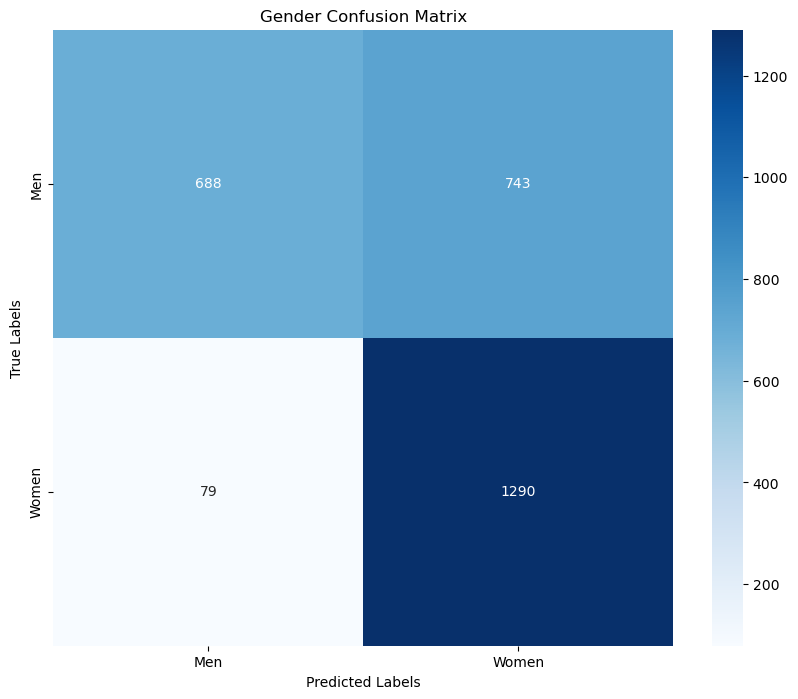

Gender Classification Report:

              precision    recall  f1-score   support

         Men       0.90      0.48      0.63      1431
       Women       0.63      0.94      0.76      1369

    accuracy                           0.71      2800
   macro avg       0.77      0.71      0.69      2800
weighted avg       0.77      0.71      0.69      2800



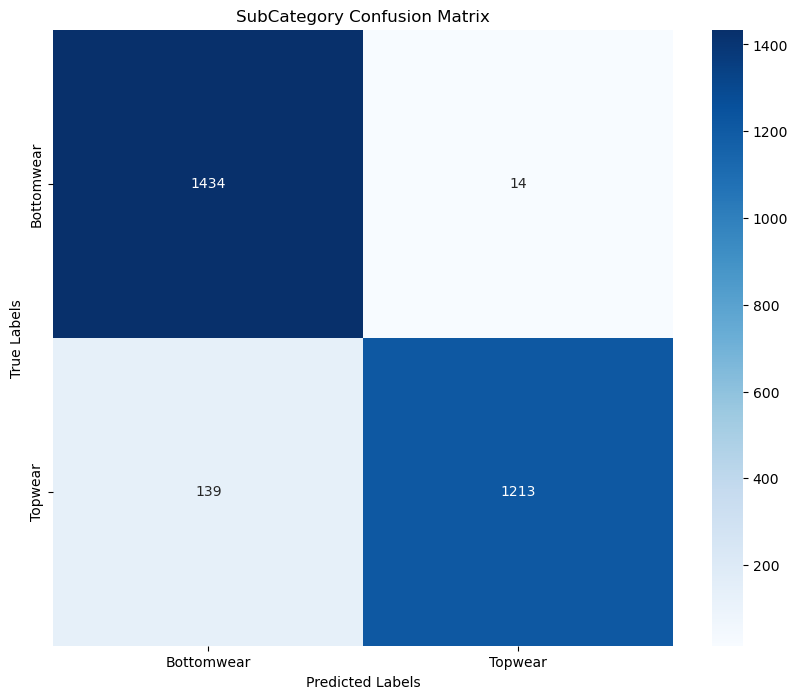

SubCategory Classification Report:

              precision    recall  f1-score   support

  Bottomwear       0.91      0.99      0.95      1448
     Topwear       0.99      0.90      0.94      1352

    accuracy                           0.95      2800
   macro avg       0.95      0.94      0.95      2800
weighted avg       0.95      0.95      0.95      2800



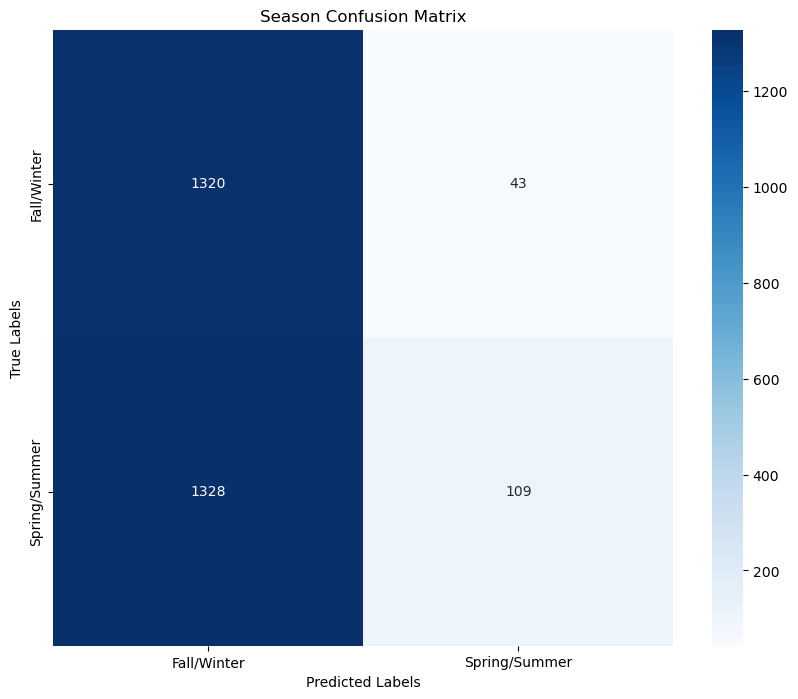

Season Classification Report:

               precision    recall  f1-score   support

  Fall/Winter       0.50      0.97      0.66      1363
Spring/Summer       0.72      0.08      0.14      1437

     accuracy                           0.51      2800
    macro avg       0.61      0.52      0.40      2800
 weighted avg       0.61      0.51      0.39      2800



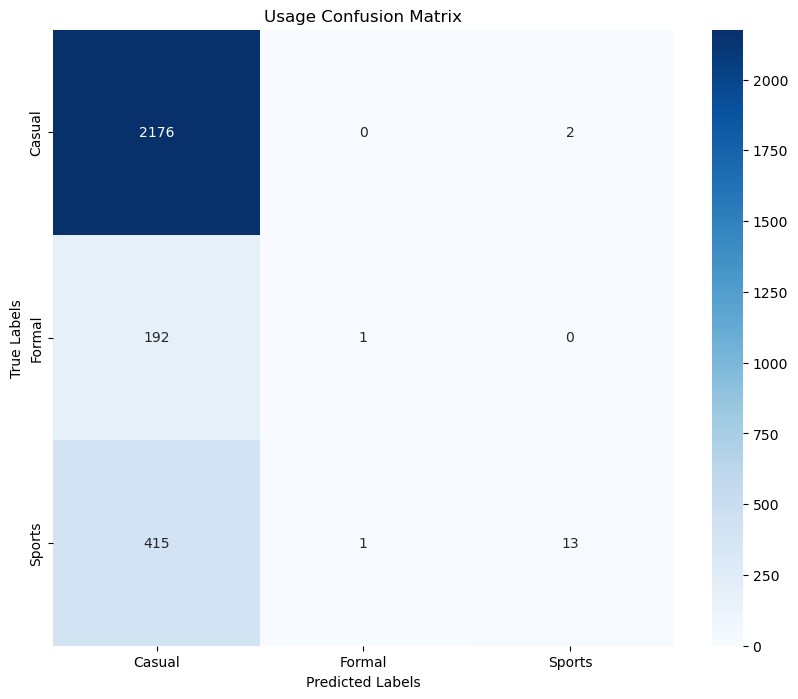

Usage Classification Report:

              precision    recall  f1-score   support

      Casual       0.78      1.00      0.88      2178
      Formal       0.50      0.01      0.01       193
      Sports       0.87      0.03      0.06       429

    accuracy                           0.78      2800
   macro avg       0.72      0.34      0.32      2800
weighted avg       0.78      0.78      0.69      2800



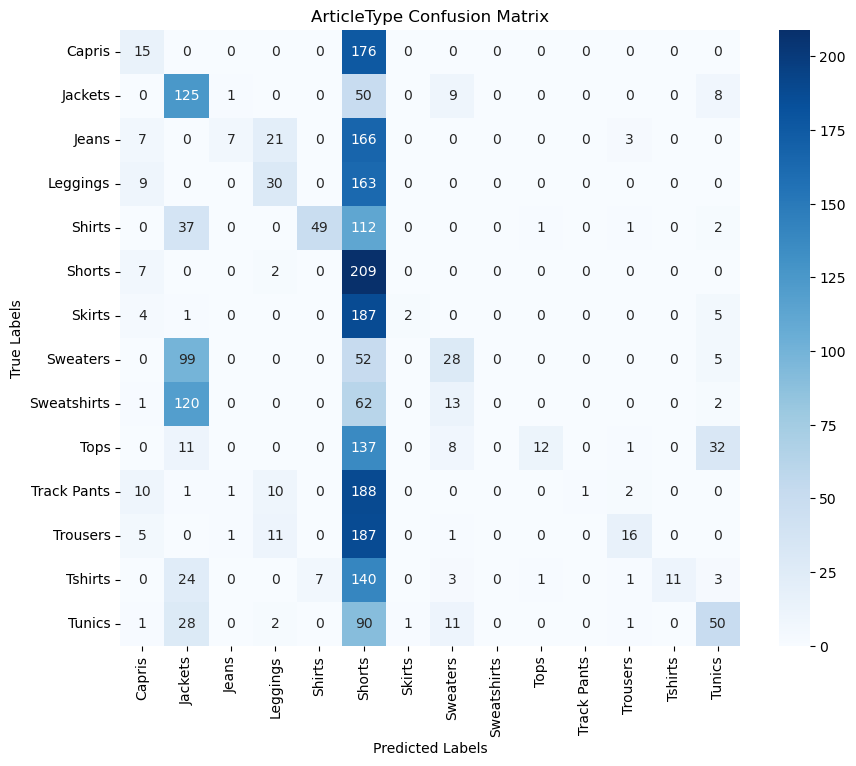

ArticleType Classification Report:

              precision    recall  f1-score   support

      Capris       0.25      0.08      0.12       191
     Jackets       0.28      0.65      0.39       193
       Jeans       0.70      0.03      0.07       204
    Leggings       0.39      0.15      0.22       202
      Shirts       0.88      0.24      0.38       202
      Shorts       0.11      0.96      0.20       218
      Skirts       0.67      0.01      0.02       199
    Sweaters       0.38      0.15      0.22       184
 Sweatshirts       0.00      0.00      0.00       198
        Tops       0.86      0.06      0.11       201
 Track Pants       1.00      0.00      0.01       213
    Trousers       0.64      0.07      0.13       221
     Tshirts       1.00      0.06      0.11       190
      Tunics       0.47      0.27      0.34       184

    accuracy                           0.20      2800
   macro avg       0.54      0.20      0.16      2800
weighted avg       0.55      0.20      0.16 

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


output = ["Gender", "SubCategory", "Season", "Usage", "ArticleType"]  # Adjust the order to match your output
y_pred = pass_aggr.predict(X_test)

for i, target_name in enumerate(output):
    
    y_pred_output = y_pred[:, i]  # Get the corresponding predicted labels for this output
    y_true_output = y_test[:, i]  # Get the corresponding true labels for this output
    
    # Confusion Matrix
    # Generate confusion matrix
    cm = confusion_matrix(y_true_output, y_pred_output, labels=target_names[i])
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names[i], yticklabels=target_names[i])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(target_name + " Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(target_name, "Classification Report:\n")
    # Print classification report for this output
    print(classification_report(y_true_output, y_pred_output, target_names=target_names[i], zero_division=0))

## Summary

### Average Output Accuracy per Model and Dataset

| Models | Train Avg Output Accuracy | Test Avg Output Accuracy |
| :---   |  ---: |       ---: | 
| 1. SGD Classifier (SVM) | 69.0 | 66.6 | 
| 2. Passive Aggressive Classifier | 64.4  | 63.0 | 